In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("../raw_data/FC26_20250921.csv", low_memory=False)

In [3]:
# In-game 'boost' columns not relevant
drop_cols = df.columns[-28:-1]
df = df.drop(columns=drop_cols)

# Work rate column empty
df = df.drop(columns=['work_rate'])

In [4]:
# Numerical and Categorical features
features_columns = ['player_id', 'player_positions',
       'overall', 'potential', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [5]:
# Additional profiling features used for filtering down the line
info_columns = ['player_id', 'player_url', 'short_name', 'long_name',
       'value_eur', 'wage_eur', 'age', 'dob', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits',
       'player_face_url']

In [6]:
# Create features and info dataframes
player_features_df = df[features_columns]
player_info_df =  df[info_columns]

In [7]:
# Convert player position string into list of positions
player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))

# Take the first given position as a player's primary position (new column)
player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])

/tmp/ipykernel_62470/3839546970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['player_positions'] = player_features_df['player_positions'].apply(lambda x: x.split(', '))
/tmp/ipykernel_62470/3839546970.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])


In [8]:
numeric_columns = ['overall', 'potential', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
                'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                'physic', 'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                'movement_reactions', 'movement_balance', 'power_shot_power',
                'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                'mentality_aggression', 'mentality_interceptions',
                'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                'mentality_composure', 'defending_marking_awareness',
                'defending_standing_tackle', 'defending_sliding_tackle',
                'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

categorical_columns = ['preferred_foot', 'player_positions', 'primary_position']

In [9]:
# MinMax scale numerical features
mm_scaler = MinMaxScaler()
player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])

/tmp/ipykernel_62470/1480969605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])


In [10]:
# One Hot Encode categorical features
# OHE player primary positions
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['primary_position']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])

# OHE player preffered foot
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['preferred_foot']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['preferred_foot']])

# Drop the original categorical columns
player_features_df = player_features_df.drop(columns=categorical_columns)


/tmp/ipykernel_62470/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/tmp/ipykernel_62470/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/tmp/ipykernel_62470/3715107006.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [11]:
# Fill in NaNs

# 0 for goalkeeping speed for all outfield players
player_features_df['goalkeeping_speed'] = player_features_df['goalkeeping_speed'].fillna(0)

# 0 for grouped outfield attribute scores for goalkeepers
columns_to_fill = ['pace', 'physic', 'defending', 'passing', 'shooting', 'dribbling']
player_features_df[columns_to_fill] = player_features_df[columns_to_fill].fillna(0)

In [12]:
player_features_df

,player_id,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.034483,0.154762,0.082353,0.134146,0.059524,0.0

In [13]:
# Assign features df to X, with player ID as the index
X = player_features_df.copy()
X.set_index('player_id', inplace=True)

In [14]:
X

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.0344

In [ ]:
# Positional groups and longer positional names if needed

# Map primary position to broader groups
position_groups = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
# player_features_df['position_group'] = player_features_df['primary_position'].map(position_groups).fillna('Other')

# Dictionary matching long position names to short
{'CM': 'Central Midfielder',
'CB': 'Central Defender',
'RM': 'Right Midfielder',
'LM': 'Left Midfielder',
'ST': 'Striker',
'CAM': 'Central Attacking Midfielder',
'CDM': 'Central Defensive Midfielder',
'RB': 'Right Fullback',
'LB': 'Left Fullback',
'GK': 'Goalkeeper',
'LW': 'Left Winger',
'RW': 'Right Winger'}

# Principal Component Analysis

### Creating components of statistically significant linear combinations of our features and reducing our dimensions.

Questions:
Which features should we include? 
How components should we choose?

In [15]:
X

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.0344

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
# PCA of all features

X_all = X.copy()

pca_all = PCA(n_components=20)
pca_all.fit(X_all)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [ ]:
# Access our components
PC_all = pca_all.components_

# Print components
PC_all = pd.DataFrame(PC_all.T,
                 index=X_all.columns)
PC_all

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
overall,-0.059171,0.002219,0.008800,-0.014333,0.290345,-0.178528,0.100103,-0.143715,-0.042471,0.025290,-0.025446,-0.094956,-0.062893,-0.059180,-0.062684,0.014626,0.114446,-0.087030,0.042236,-0.052279,0.115448,0.059710,-0.054229,-0.001835,0.054143,-0.075507,-0.032593,-0.087255,0.005438,0.110016,0.120277,-0.192073,-0.021975,0.002833,0.020819,0.036255,-0.023652,-0.001402,-0.085038,-0.029631,-0.014178,-0.078660,-0.054444,0.072512,-0.367273,0.080639,-0.489255,0.160973,-0.323104,0.062461,-0.308183,-0.201443,0.052948,-0.063683,-0.057284,-0.114312,0.003092,-0.020815,0.011270,-0.001481,-0.000000e+00,0.000000e+00
potential,-0.036137,-0.003614,-0.000659,-0.015710,0.147006,-0.101217,0.093199,-0.077045,-0.021154,0.020481,-0.019149,-0.195597,-0.088789,-0.078049,-0.095619,0.061779,0.518219,0.109286,0.160166,-0.175641,0.346174,-0.045672,0.232833,-0.203381,0.245404,0.182760,-0.131651,0.199404,-0.060946,-0.220083,-0.107562,0.196790,0.042320,0.039539,-0.040531,0.075402,0.141701,-0.046199,0.020481,-0.130426,0.018769,0.050573,0.003205,-0.043420,0.102844,-0.037185,0.076003,-0.018380,0.038125,-0.005557,0.044756,0.027938,-0.006128,0.009124,0.012142,0.004410,-0.008923,0.005225,-0.000834,0.000236,-6.003276e-15,-1.174163e-14
height_cm,0.049622,0.050275,0.031531,0.113370,0.131919,0.007916,-0.009404,-0.019491,0.003788,-0.017618,0.024039,0.119391,0.116892,0.148495,-0.013604,0.035007,0.215589,0.189002,-0.071077,0.106066,-0.026777,0.124460,-0.000251,0.076243,-0.097076,0.120772,-0.263600,0.049769,0.051665,0.073800,-0.293347,0.090174,-0.107643,-0.133627,0.019039,-0.110991,-0.029734,0.108326,0.374140,0.581446,0.080875,-0.139948,0.079198,-0.074618,-0.120192,-0.029052,-0.055522,-0.000593,-0.021093,0.006664,-0.036720,-0.032431,0.000106,-0.004430,0.005258,0.007197,0.003972,-0.002503,0.000599,-0.000251,1.368315e-14,1.274528e-14
weight_kg,0.037716,0.040113,0.030753,0.106954,0.136758,-0.010454,-0.016482,-0.029323,-0.000268,-0.014705,0.016259,0.122986,0.131739,0.153598,-0.001402,0.011248,0.088502,0.100046,-0.099791,0.127906,-0.058836,0.021849,-0.060127,0.074714,-0.126462,0.297021,-0.234892,0.187628,-0.166622,0.283641,-0.258683,-0.299740,-0.126258,-0.290760,-0.004097,-0.014826,0.065801,-0.038106,-0.294856,-0.408361,-0.094017,0.106028,-0.017343,0.036570,0.075766,0.033180,0.027473,-0.004001,0.002936,-0.005674,0.019773,0.008998,-0.006123,0.002993,0.030114,0.008868,0.003913,-0.001200,-0.000415,0.000895,-2.895563e-14,-1.040606e-14
weak_foot,-0.047111,-0.055546,0.024965,-0.005893,0.047815,-0.016820,0.045925,-0.021279,0.007390,0.019774,0.003157,-0.042497,-0.035899,0.009760,0.963833,-0.156085,0.157746,0.031414,0.041286,-0.024901,-0.041259,0.012021,0.007458,-0.009614,0.009601,-0.014915,0.003122,-0.025560,-0.004872,0.008385,0.001041,-0.014219,0.001452,0.004146,-0.012331,-0.000207,0.000473,-0.003105,-0.008270,-0.002814,0.002316,-0.000612,0.003842,0.000978,-0.004002,0.008337,-0.007721,0.003416,-0.000867,-0.001030,-0.002432,-0.000762,0.000154,-0.002485,-0.001106,0.002317,-0.000898,0.000994,0.000696,0.000076,1.063079e-15,2.402506e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
primary_position_RM,-0.023349,-0.055761,-0.050612,-0.036951,-0.097058,-0.083204,0.201144,-0.007006,-0.254196,-0.418377,-0.622113,0.331746,0.191492,-0.202732,0.006814,-0.039777,0.066750,-0.060920,0.084194,0.001629,-0.062196,-0.007063,-0.022592,0.003813,0.070466,0.020109,-0.022572,0.044191,0.028381,0.007028,0.015304,0.020406,-0.033366,0.010374,-0.006410,0.031678,-0.010120,-0.000034,-0.010490,0.004783,-0.003810,0.005691,-0.005521,-0.013435,-0.031240,-0.042325,0.005158,0.000690,0.011381,0.001225,-0.004351,0.006658,-0.001109,0.005549,0.01

In [ ]:
# Remapping players with PCAs
X_all_proj = pca_all.transform(X_all)
X_all_proj = pd.DataFrame(X_all_proj, index=X_all.index)
X_all_proj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,-1.977765,-0.298012,0.476839,-0.325512,0.992991,-0.621234,0.552504,-0.163471,0.681490,0.321033,-0.093658,-0.106062,0.207012,-0.092149,0.013089,-0.046210,0.237256,-0.018536,0.439985,0.084186,0.181378,-0.016465,-0.147482,0.478926,-0.011956,0.361061,0.379133,0.110933,0.182372,-0.101142,-0.035013,0.022082,-0.035655,-0.015511,0.011802,-0.115523,-0.046646,0.032664,0.064422,0.047570,0.016826,0.007084,0.030827,-0.035576,0.059705,0.011760,0.007868,-0.038172,-0.009803,-0.017457,-0.045158,0.043525,0.041794,0.017361,-0.008123,0.001173,-0.002986,0.006609,-0.001330,-0.004701,1.779132e-13,3.053113e-14
239053,-1.950642,-0.103675,0.586825,-0.651652,1.097780,0.268739,0.098774,-0.498904,-0.150280,0.101931,-0.082822,-0.166954,0.046549,0.038274,0.038024,-0.020338,0.204385,0.257037,0.244062,-0.007192,0.082601,0.081241,0.027141,0.366435,-0.018308,0.268598,0.362642,0.007182,0.099435,-0.002900,0.082471,0.004359,0.022489,0.110218,0.070390,0.002708,0.015580,-0.074859,0.000940,0.011456,0.005046,-0.021592,-0.029923,-0.025931,0.013019,0.032631,-0.040887,-0.040706,-0.057409,0.051837,0.046502,-0.025106,-0.003404,0.015778,-0.006341,-0.019365,0.000311,-0.004125,0.002609,-0.003260,1.088574e-13,7.438494e-15
212622,-1.825927,0.002576,0.585798,-0.583836,1.048849,-0.720983,-0.082671,0.486644,-0.169697,-0.005884,-0.041394,-0.242116,-0.287299,-0.165010,0.095670,-0.025171,0.053222,0.054821,0.018037,0.030294,0.131184,-0.027041,0.051839,0.412322,0.144021,0.256406,0.257651,-0.043593,0.111749,-0.024321,-0.106251,-0.073598,-0.016477,-0.011405,-0.019222,-0.038068,0.085136,-0.071342,-0.023749,0.005663,-0.048008,0.003018,-0.019595,-0.040436,0.001298,-0.011094,-0.051460,-0.041444,-0.013971,0.035273,0.035800,0.009062,-0.048123,0.016078,-0.014835,0.001387,0.001531,-0.001063,0.004361,-0.002755,9.348078e-14,3.108624e-15
235212,-1.898248,-0.126698,0.579114,-0.453414,0.554392,-0.845003,-0.129556,-0.803335,0.131819,-0.260450,0.143396,-0.066294,-0.234558,-0.033525,0.088264,-0.005136,0.098882,0.264822,0.171141,0.084875,0.324731,0.041748,-0.084637,0.405171,0.001914,0.140993,0.281533,0.050208,0.069178,-0.059224,0.012141,-0.023072,-0.059719,-0.005986,0.043324,-0.043678,0.029915,-0.041680,0.040168,0.017148,0.068424,-0.029913,0.020480,0.075478,0.023218,0.062865,0.065977,0.012181,0.005374,-0.014225,-0.032609,-0.004176,0.007951,-0.012558,-0.013713,0.003127,-0.007635,-0.002221,0.000693,-0.002169,7.910339e-14,1.643130e-14
224232,-1.866810,-0.177487,0.525343,-0.808031,0.934142,0.295913,0.141962,-0.436795,-0.110954,0.113097,-0.095954,-0.284292,-0.168493,-0.191752,0.065984,-0.043592,0.066152,0.013554,0.215663,0.010501,0.104485,-0.063949,-0.032242,0.428096,0.054014,0.273870,0.222531,-0.055549,0.126771,-0.020967,0.006034,-0.032642,0.106533,0.002271,0.071442,-0.013661,0.024919,-0.014943,0.009335,0.034023,-0.021833,-0.007620,0.029576,-0.023774,0.012902,0.021530,0.010659,-0.007876,-0.021219,-0.024719,0.022529,-0.069641,0.022704,-0.015806,0.017288,0.005857,0.002137,-0.003824,-0.003986,0.001793,-6.228351e-14,-7.438494e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,2.910573,-0.129498,-0.009790,-0.102890,-0.154841,0.196173,-0.122797,0.215456,0.099951,-0.038341,0.054049,0.417082,-0.014077,0.135439,-0.067693,0.031461,0.010992,0.088320,-0.071773,0.143580,-0.100825,0.066768,0.054671,-0.001921,-0.142066,0.057833,0.110277,-0.060362,0.044819,0.067776,-0.009115,-0.006417,0.003676,-0.095801,0.060558,-0.175030,0.035255,0.000241,0.046335,-0.087325,-0.040512,0.002132,0.106536,-0.025824,0.068957,0.124406,0.029387,-0.019923,-0.046965,0.007975,-0.017015,-0.0

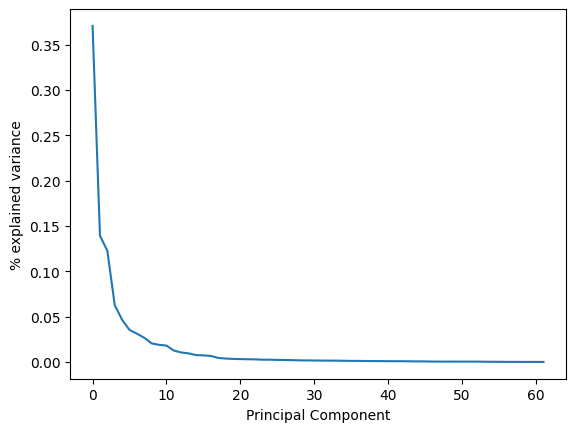

In [ ]:
# Assessing sensible number of components that explain dataset
pca_all.explained_variance_ratio_
plt.plot(pca_all.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');


#### 20 components enough?

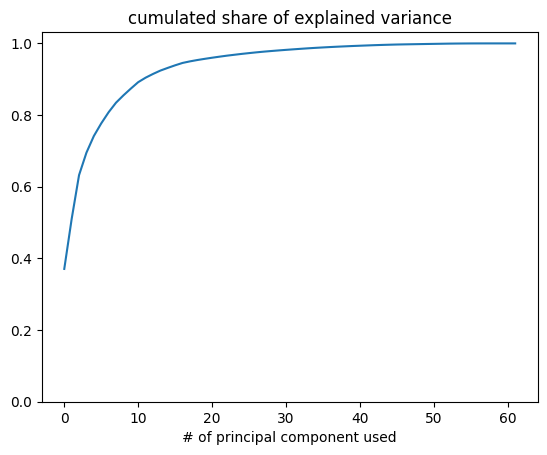

In [ ]:
# Assessing sensible number of components that explain dataset
plt.plot(np.cumsum(pca_all.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

In [ ]:
# Detailed skill attributes only
skill_attributes_columns = ['attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [28]:
X_attributes = X[skill_attributes_columns].copy()

In [ ]:
# PCA on detailed attritbues only
pca_attributes = PCA()
pca_attributes.fit(X_attributes)

X_attributes_proj = pca_attributes.transform(X_attributes)
X_attributes_proj = pd.DataFrame(X_attributes_proj, index=X_attributes.index)
X_attributes_proj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,1.709295,0.002810,0.796939,-0.153128,0.059983,-0.107279,0.187202,0.049477,-0.162496,-0.032854,-0.053074,0.065296,-0.080338,-0.018919,0.015207,-0.015665,-0.036315,0.025917,-0.047783,0.032928,0.035655,-0.029103,-0.020714,0.030578,0.007551,0.002317,-0.010373,-0.040207,0.006969,-0.019830,-0.051363,0.003977,0.053857,0.037662,-0.037299
239053,1.666497,0.153331,0.772054,-0.230626,0.053121,0.059923,-0.072182,0.080221,-0.322362,0.025191,0.005538,0.015813,0.002327,0.041281,0.108939,-0.036653,-0.067553,0.083811,-0.061582,-0.060562,0.063010,-0.031113,0.029158,0.018942,-0.015928,-0.026681,-0.031058,0.005605,-0.029317,-0.040393,0.069160,-0.020084,-0.018635,-0.008383,-0.018287
212622,1.631639,0.190027,0.735140,-0.455352,-0.076887,0.047197,0.061918,-0.035287,0.086741,0.012795,-0.081895,-0.061393,0.010876,-0.052153,-0.072757,0.019179,-0.037774,-0.000559,-0.003055,-0.057737,0.050488,-0.039864,0.026166,-0.047433,-0.004485,-0.028124,-0.042848,-0.007762,-0.058394,-0.018031,0.043569,-0.024178,0.002823,-0.048101,-0.043299
235212,1.640518,0.095229,0.616773,-0.267366,0.179086,0.143211,-0.029078,-0.059534,-0.163570,-0.034278,-0.192495,-0.071766,-0.025456,-0.015470,0.043989,-0.066326,-0.059002,0.002509,-0.044553,-0.066211,0.062515,-0.010812,-0.010751,0.070935,-0.010462,0.000286,0.069239,0.046120,0.061947,0.003133,-0.049203,0.002396,-0.001191,0.004395,-0.014738
224232,1.630969,0.059796,0.643551,-0.469841,0.047872,-0.040498,0.179024,-0.040803,-0.065824,0.035438,-0.092683,-0.008853,-0.096103,0.043600,0.027922,0.088445,-0.069240,0.063377,-0.075291,-0.037805,0.034363,-0.053461,0.012866,0.000169,0.014108,0.022213,-0.021886,0.007410,0.015855,-0.016125,-0.000073,0.036932,-0.065125,0.015705,0.010749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,-2.415902,-0.028274,-0.199080,0.070714,-0.413341,0.043232,-0.162192,0.057485,-0.029536,0.060726,0.054663,0.051546,0.013554,0.063964,-0.001811,0.008133,0.081817,0.025645,0.082188,-0.010189,0.032320,0.002969,-0.092387,-0.001263,0.024607,0.101272,-0.036242,0.021407,0.037388,-0.030566,-0.008695,-0.009982,0.023246,-0.068881,0.019579
76593,-2.388558,-0.051306,-0.255158,0.037082,-0.362183,0.095318,0.030173,0.039269,0.126831,0.006843,0.007039,0.002183,0.033271,0.116785,0.069887,-0.007072,0.028789,-0.017882,0.064578,-0.016703,0.065921,-0.105688,-0.045793,0.090056,0.048241,0.012871,-0.027090,0.048040,0.025320,0.015418,-0.035361,-0.054589,0.052550,-0.061600,0.034831
77205,-2.365826,-0.100808,-0.379345,-0.165054,-0.390031,0.039584,0.091042,0.088822,0.136188,-0.003702,-0.018243,0.018337,0.058273,0.068953,0.010680,0.020575,0.093970,0.015375,0.029292,-0.018025,0.070560,-0.067855,-0.046672,0.034460,0.007886,0.008575,0.005545,0.053613,-0.034198,0.033619,-0.036929,0.003111,0.061135,-0.060245,-0.004725


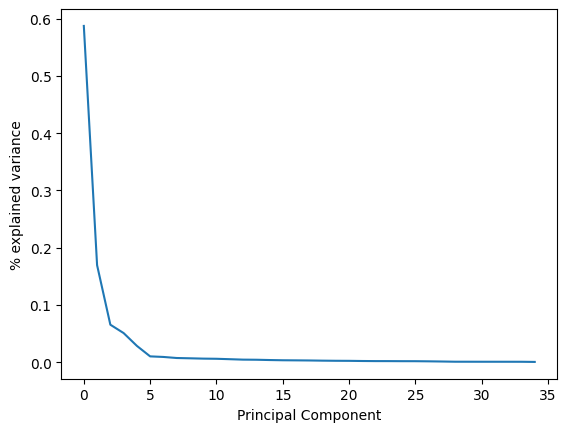

In [ ]:
# Assessing sensible number of components that explain dataset
pca_attributes.explained_variance_ratio_
plt.plot(pca_attributes.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');
# 5 PCs enough?

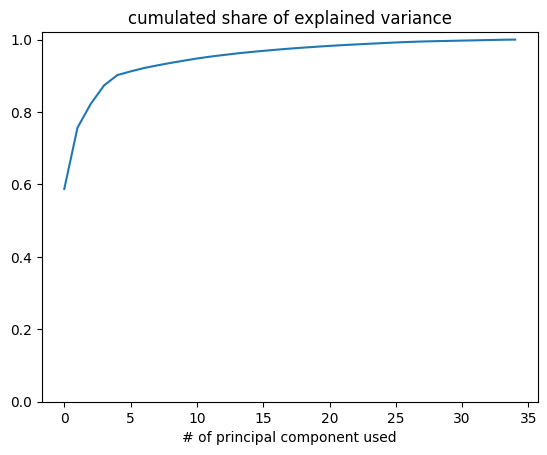

In [ ]:
# Assessing sensible number of components that explain dataset
plt.plot(np.cumsum(pca_attributes.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

#### 5 or 10 components?

In [40]:
X.columns

Index(['overall', 'potential', 'height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'international_reputation', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    

In [41]:
# Features without position information and aggergated attributes
attributes_and_physical_features = ['height_cm', 'weight_kg', 'weak_foot',
       'skill_moves', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'preferred_foot_Left', 'preferred_foot_Right']

In [ ]:
# PCA on features without position information and aggergated attributes
X_physical_and_attributes = X[attributes_and_physical_features].copy()

pca_physical_and_attributes = PCA()
pca_physical_and_attributes.fit(X_physical_and_attributes)

X_physical_and_attributes_proj = pca_physical_and_attributes.transform(X_physical_and_attributes)
X_physical_and_attributes_proj = pd.DataFrame(X_physical_and_attributes_proj, index=X_physical_and_attributes.index)
X_physical_and_attributes_proj

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
player_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252371,1.685293,-0.623885,0.076874,0.737391,-0.374078,0.066003,0.089693,-0.008184,-0.123521,0.023023,0.020746,-0.251000,0.019756,-0.074628,-0.089057,-0.050118,-0.067416,0.006238,-0.024654,-0.042314,0.018292,0.029008,-0.039313,0.051487,0.024233,0.053862,-0.031326,-0.031058,0.042934,-0.003551,0.013641,-0.025850,-0.040412,0.005787,-0.023420,-0.053668,-0.001110,0.051375,0.036802,-0.039081,-3.108624e-15
239053,1.608427,-0.582952,0.245805,0.680160,-0.444966,0.059221,0.077895,0.002389,0.104279,-0.246002,-0.087325,-0.184252,0.058253,-0.049741,-0.037733,0.063540,-0.003492,-0.031297,0.111219,0.007943,-0.077689,0.114873,-0.068859,-0.066571,0.063820,0.012903,-0.034372,0.015622,0.018657,-0.020065,-0.029054,-0.025811,0.005382,-0.029000,-0.039058,0.069940,-0.017190,-0.018174,-0.007932,-0.020171,3.219647e-15
212622,1.580460,-0.561142,0.266546,0.575313,-0.659379,-0.069594,0.096483,-0.102566,0.022781,0.000796,-0.013611,0.108118,-0.015747,-0.060137,0.077519,-0.036946,-0.004135,-0.013577,-0.103871,-0.034365,-0.021468,-0.016513,0.004072,-0.059641,0.053821,0.013756,-0.050262,0.026832,-0.048642,0.006098,-0.024747,-0.039150,-0.007489,-0.058448,-0.018388,0.044943,-0.021639,0.003257,-0.048437,-0.039204,-1.287859e-14
235212,1.626648,-0.580441,0.145700,0.518093,-0.447053,0.183505,0.093390,0.038814,0.174948,0.060337,-0.096260,-0.164470,-0.011317,-0.227684,0.044442,0.009787,-0.054103,-0.030992,0.028233,-0.069816,-0.038292,0.005678,-0.030007,-0.058942,0.053079,0.030036,-0.011085,-0.028864,0.076295,-0.025299,0.007364,0.059074,0.046921,0.060552,0.003115,-0.049551,-0.000410,-0.001674,0.004017,-0.017137,-2.220446e-16
224232,1.588775,-0.576063,0.127050,0.458388,-0.667785,0.056235,0.093107,-0.155597,-0.100756,-0.036017,-0.065984,-0.047956,0.037325,-0.090709,0.006098,-0.114949,0.002315,0.003713,-0.024670,0.078044,-0.062210,0.088169,-0.084157,-0.036283,0.035593,0.029474,-0.058544,0.002872,0.000780,0.012720,0.027667,-0.020593,0.006568,0.015720,-0.014426,-0.001012,0.038142,-0.065089,0.015741,0.011412,2.775558e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267946,-2.489543,0.014172,-0.042012,-0.134103,0.161122,-0.418807,-0.073801,0.170643,0.142087,-0.059261,0.036311,-0.005543,0.070541,0.049707,-0.062145,-0.019010,0.063917,-0.010403,-0.005380,0.010769,0.071927,-0.008677,0.096762,-0.028399,0.032908,-0.070460,0.018079,-0.076217,-0.040761,0.040256,0.100207,-0.034813,0.021973,0.038371,-0.030797,-0.008149,-0.010699,0.023499,-0.069713,0.024931,1.110223e-16
76593,-2.445690,0.009953,-0.088718,-0.265503,0.087711,-0.362757,-0.067094,-0.044159,0.070151,0.108554,0.103513,0.042862,0.006182,0.007784,0.003860,-0.002422,0.109919,-0.007313,0.092144,0.040536,-0.000740,-0.000558,0.063432,-0.007113,0.055334,0.012718,-0.101636,-0.077415,0.077246,0.039812,0.022317,-0.031694,0.046812,0.024855,0.016537,-0.033357,-0.056804,0.051418,-0.061216,0.033279,-1.043610e-14
77205,-2.417332,0.013306,-0.148481,-0.438746,-0.070943,-0.391610,-0.064540,-0.063304,0.009209,0.067748,0.151465,0.041263,-0.009712,0.000793,-0.012727,-0.015098,0.105208,-0.024958,-0.001810,0.024964,0.091840,-0.011142,0.040462,-0.024459,0.067521,-0.018300,-0.066539,-0.061282,0.012585,0.012328,0.015844,0.004020,0.053212,-0.034682,0.032179,-0.037017,0.001539,0.061282,-0.060069,-0.002553,-2.664535e-15


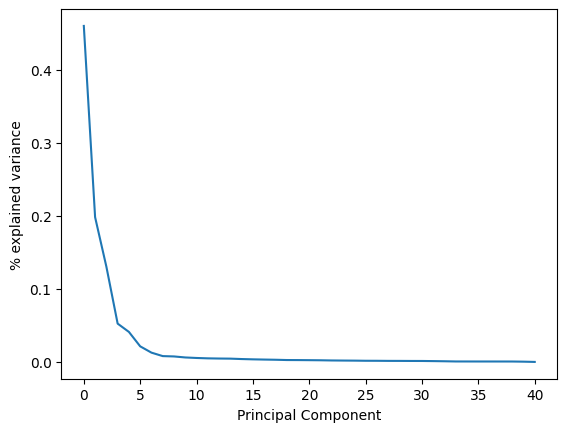

In [ ]:
# n_component analysis
pca_physical_and_attributes.explained_variance_ratio_
plt.plot(pca_physical_and_attributes.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');


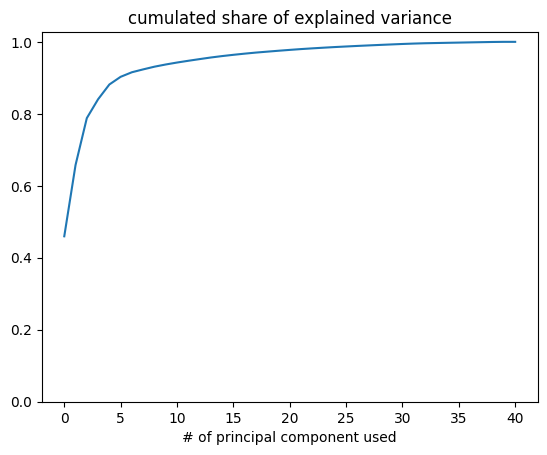

In [ ]:
# n_component analysis
plt.plot(np.cumsum(pca_physical_and_attributes.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('# of principal component used');

#### 10 or 20 components?

# Check with K Nearest Neighbours

### Check similar alternatives output after dimensionality reduction.

Questions:
Do different reductions return different similarity suggestions?

In [46]:
from sklearn.neighbors import NearestNeighbors

In [67]:
nbrs = NearestNeighbors(n_neighbors=20).fit(X_attributes_proj)
nbrs.kneighbors(X_attributes_proj)


(array([[2.98023224e-08, 4.53161662e-01, 4.65580086e-01, ...,
         5.47099275e-01, 5.55102377e-01, 5.61781756e-01],
        [4.21468485e-08, 4.29817576e-01, 4.31097123e-01, ...,
         5.48291129e-01, 5.57695306e-01, 5.60405406e-01],
        [0.00000000e+00, 4.02982379e-01, 4.05684165e-01, ...,
         5.00839847e-01, 5.02171549e-01, 5.02597827e-01],
        ...,
        [0.00000000e+00, 2.64036342e-01, 2.88419402e-01, ...,
         3.37764150e-01, 3.38563975e-01, 3.40917304e-01],
        [0.00000000e+00, 3.68508136e-01, 4.05921706e-01, ...,
         4.96608704e-01, 4.96608731e-01, 5.00578784e-01],
        [0.00000000e+00, 2.89384044e-01, 3.23933751e-01, ...,
         3.94525309e-01, 3.94986772e-01, 3.96904961e-01]],
       shape=(18405, 20)),
 array([[    0,    26,     4, ...,     7,    25,    19],
        [    1,    18,    35, ...,     8,    24,    62],
        [    2,     6,    32, ...,    44,    91,    37],
        ...,
        [18402, 18336, 18161, ..., 18305, 18372, 18298]

In [68]:
player_names_ids = df[['short_name', 'player_id']]

In [ ]:
id_to_row = pd.Series(df.index.values, index=df['player_id']).to_dict()
row_pos = id_to_row[246191]
dists, idxs = nbrs.kneighbors(X_attributes_proj[row_pos:row_pos+1])
neighbor_ids = df['player_id'].iloc[idxs[0][1:]].tolist()


In [70]:
neighbor_ids

[233419,
 231478,
 194765,
 247635,
 243014,
 215590,
 208722,
 244675,
 231443,
 240243,
 236015,
 225201,
 241084,
 259913,
 200104,
 236772,
 242964,
 246669,
 220502]

In [71]:
df[player_names_ids['player_id'].isin(neighbor_ids)]

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,player_face_url
9,194765,/player/194765/antoine-griezmann/260004/,26,4,2025-09-19,A. Griezmann,Antoine Griezmann,"ST, LM, CAM",85,85,26000000,115000,34,1991-03-21,176,67,53.0,La Liga,1.0,240.0,Atlético Madrid,SUB,7.0,NaN,2022-10-10,2027.0,18,France,NaN,NaN,NaN,Left,3,4,4,Unique,Yes,54600000.0,"#Dribbler, #Playmaker , #Acrobat, #Clinical fi...","Chip Shot +, Finesse Shot, Gamechanger, Incisi...",77.0,86.0,85.0,88.0,59.0,73.0,82,86,79,86,86,86,89,85,83,90,80,75,88,87,85,85,84,77,70,86,74,59,87,86,79,88,45,63,64,14,8,14,13,14,NaN,https://cdn.sofifa.net/players/194/765/26_120.png
14,244675,/player/244675/oihan-sancet-tirapu/260004/,26,4,2025-09-19,Sancet,Oihan Sancet Tirapu,"CAM, CM, ST",84,88,58500000,66000,25,2000-04-25,188,77,53.0,La Liga,1.0,448.0,Athletic Club,CAM,8.0,NaN,2017-07-01,2032.0,45,Spain,NaN,NaN,NaN,Right,4,4,3,Lean (185+),Yes,127200000.0,NaN,"Finesse Shot, Precision Header, Technical, Fir...",76.0,83.0,80.0,85.0,70.0,82.0,75,85,82,84,79,85,82,63,80,85,74,77,84,84,79,83,88,86,80,81,80,71,85,84,77,85,67,70,60,15,11,6,15,7,NaN,https://cdn.sofifa.net/players/244/675/26_120.png
27,236772,/player/236772/dominik-szoboszlai/260004/,26,4,2025-09-19,D. Szoboszlai,Dominik Szoboszlai,"CAM, CM",83,86,49500000,110000,24,2000-10-25,186,74,13.0,Premier League,1.0,9.0,Liverpool,SUB,8.0,NaN,2023-07-02,2028.0,23,Hungary,1886.0,LCM,10.0,Right,4,4,3,Normal (185+),Yes,95300000.0,NaN,"Power Shot, Whipped Pass, Technical",79.0,82.0,84.0,82.0,67.0,76.0,83,79,65,85,81,83,87,83,83,84,76,81,78,83,68,89,76,89,69,79,75,67,83,83,83,82,65,72,63,10,10,13,10,6,NaN,https://cdn.sofifa.net/players/236/772/26_120.png
28,233419,/player/233419/raphael-dias-belloli/260004/,26,4,2025-09-19,Raphinha,Raphael Dias Belloli,"LM, LW",89,89,104000000,200000,28,1996-12-14,176,68,53.0,La Liga,1.0,241.0,FC Barcelona,LM,11.0,NaN,2022-07-13,2028.0,54,Brazil,NaN,NaN,NaN,Left,4,4,4,Lean (170-185),Yes,213200000.0,"#Speedster, #Dribbler, #Crosser, #Acrobat, #Cl...","Rapid +, Finesse Shot, Power Shot, Trickster, ...",91.0,84.0,85.0,87.0,53.0,75.0,86,87,74,85,72,88,85,79,80,88,90,91,88,87,79,83,82,91,65,82,77,56,89,87,78,85,49,54,38,8,7,13,8,14,NaN,https://cdn.sofifa.net/players/233/419/26_120.png
29,246669,/player/246669/bukayo-saka/260004/,26,4,2025-09-19,B. Saka,Bukayo Saka,"RW, RM",88,90,118500000,230000,23,2001-09-05,178,65,13.0,Premier League,1.0,1.0,Arsenal,RW,7.0,NaN,2018-09-14,2027.0,14,England,1318.0,RES,25.0,Left,4,3,4,Lean (170-185),Yes,228100000.0,"#Dribbler, #Crosser","Whipped Pass +, Finesse Shot, Technical",84.0,82.0,85.0,88.0,60.0,73.0,90,84,49,85,79,89,88,74,77,88,87,81,85,88,88,79,72,86,68,81,68,62,86,86,87,82,60,62,60,7,8,13,9,13,NaN,https://cdn.sofifa.net/players/246/669/26_120.png
33,231443,/player/23